# <center> <u> HyperTuning and Feature Selection on Carprice Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.preprocessing import StandardScaler,RobustScaler,LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./CarPricesData.csv')

In [3]:
data.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1434 non-null   float64
 2   KM         1436 non-null   int64  
 3   FuelType   1432 non-null   object 
 4   HP         1436 non-null   int64  
 5   MetColor   1436 non-null   int64  
 6   Automatic  1436 non-null   int64  
 7   CC         1434 non-null   float64
 8   Doors      1436 non-null   int64  
 9   Weight     1434 non-null   float64
dtypes: float64(3), int64(6), object(1)
memory usage: 112.3+ KB


In [5]:
data.isnull().mean()*100

Price        0.000000
Age          0.139276
KM           0.000000
FuelType     0.278552
HP           0.000000
MetColor     0.000000
Automatic    0.000000
CC           0.139276
Doors        0.000000
Weight       0.139276
dtype: float64

In [6]:
data.dropna(inplace=True)

In [7]:
data.duplicated().sum()

1

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
le = LabelEncoder()

In [10]:
for i in data.columns:
    if data[i].dtypes == 'object':
        data[i] = le.fit_transform(data[i])

In [11]:
data.sample(10)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
566,10995,55.0,36406,2,110,1,0,1600.0,4,1035.0
400,8950,53.0,115113,2,97,1,0,1400.0,3,1025.0
1255,7950,75.0,76382,2,110,1,0,1600.0,3,1055.0
696,12250,60.0,96000,1,72,0,0,2000.0,4,1100.0
239,11950,40.0,58954,2,110,1,0,1600.0,5,1080.0
940,9450,61.0,54125,2,110,1,0,1600.0,5,1035.0
1282,7500,80.0,73200,2,110,1,0,1600.0,5,1070.0
995,9950,68.0,42750,2,110,1,0,1600.0,3,1050.0
16,22750,30.0,34000,2,192,1,0,1800.0,3,1185.0
37,14950,23.0,10000,2,97,1,0,1400.0,3,1100.0


### Selecting the features and targets

In [12]:
x = data.iloc[:, 1:].values
y = data.iloc[: ,0].values

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42,shuffle=True)

### Checking model scores without feature selection

In [14]:
model = LinearRegression()

In [15]:
model.fit(x_train,y_train)

LinearRegression()

In [16]:
y_pred = model.predict(x_test)

In [17]:
model.score(x_test,y_test)

0.8708517690870113

In [18]:
model.score(x_train,y_train)

0.861762477331229

### Defining feature selection with all features included

In [19]:
fs = SelectKBest(score_func=f_regression, k='all')

### Fitting the fs

In [20]:
fs.fit(x_train,y_train)

SelectKBest(k='all', score_func=<function f_regression at 0x000001678AA13940>)

### Checking the scores for the features

In [21]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' %(i, fs.scores_[i]))

Feature 0: 3723.096607
Feature 1: 589.688041
Feature 2: 0.007963
Feature 3: 137.680309
Feature 4: 10.973220
Feature 5: 0.873022
Feature 6: 23.886260
Feature 7: 40.573243
Feature 8: 506.819328


### Plotting the scores in a bar grapgh

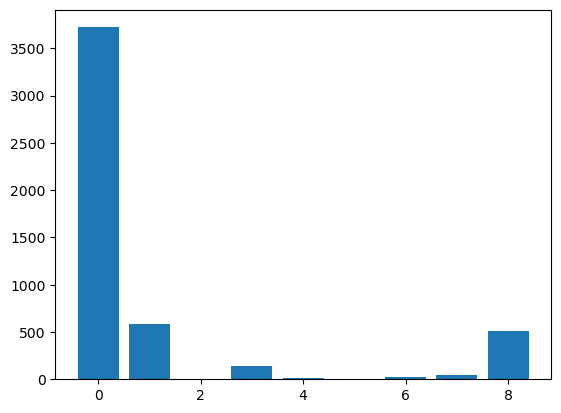

In [22]:
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

#### Selecting k = 4

In [23]:
fs = SelectKBest(score_func=f_regression, k=4)

#### Transorm the train and test data

In [24]:
fs.fit(x_train,y_train)

SelectKBest(k=4, score_func=<function f_regression at 0x000001678AA13940>)

In [25]:
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

In [26]:
x_test_fs.shape

(285, 4)

In [27]:
x_train_fs.shape

(1140, 4)

In [28]:
model =LinearRegression()

In [29]:
model.fit(x_train_fs,y_train)

LinearRegression()

In [30]:
y_pred_fs = model.predict(x_test_fs)

In [31]:
model.score(x_train_fs,y_train)

0.8581005278601517

In [32]:
model.score(x_test_fs,y_test)

0.8660327850546731

#### Selecting only the top feature

In [33]:
fs = SelectKBest(score_func=f_regression, k=1)

#### Fitting the fs

In [34]:
fs.fit(x_train,y_train)

SelectKBest(k=1, score_func=<function f_regression at 0x000001678AA13940>)

#### Transforming the training and testing data

In [35]:
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

In [36]:
model.fit(x_train_fs,y_train)

LinearRegression()

In [37]:
model.score(x_train_fs,y_train)

0.7658964443630741

In [38]:
model.score(x_test_fs,y_test)

0.78439624199139

#### We can see that there is 76% of accuracy just by using only one variable

### GradientBoostingRegressor()

In [39]:
best_model = GradientBoostingRegressor().fit(x_train_fs ,y_train)
y_pred = best_model.predict(x_test_fs)
score = r2_score(y_test,y_pred)
print("score before hyper parameter tuning is :{}".format(score))

score before hyper parameter tuning is :0.8600159810881348


In [40]:
gbr = GradientBoostingRegressor()

In [41]:
parameter = {'learning_rate':[0.01,0.02,0.03,0.04,0.05],
                'subsample':  [0.9,0.5,0.4,0.2,0.1],
              'n_estimators':[100,400,900],
                 'max_depth':[4,6,7]}

In [42]:
grid_gbr = GridSearchCV(estimator= gbr ,param_grid=parameter,cv=2,n_jobs=-1,verbose=3)

In [43]:
grid_gbr.fit(x_train_fs,y_train)

Fitting 2 folds for each of 225 candidates, totalling 450 fits


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],
                         'max_depth': [4, 6, 7],
                         'n_estimators': [100, 400, 900],
                         'subsample': [0.9, 0.5, 0.4, 0.2, 0.1]},
             verbose=3)

In [44]:
grid_gbr.best_params_

{'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.9}

In [45]:
grid_gbr_tuned = GradientBoostingRegressor(learning_rate= 0.01,max_depth=4,n_estimators= 400, subsample= 0.4)

In [46]:
grid_gbr_tuned.fit(x_train_fs,y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=400,
                          subsample=0.4)

In [47]:
y_pred_gbr = grid_gbr_tuned.predict(x_test_fs)

In [48]:
score = r2_score(y_test,y_pred_gbr)
mae = mean_absolute_error(y_test,y_pred_gbr)
mse = mean_squared_error(y_test,y_pred_gbr)
rsme = np.sqrt(mse)
print('r2_score :',score)
print('mae :',mae)
print('mse :',mse)
print('rsme :',rsme)

r2_score : 0.8626155837971516
mae : 998.8905247621896
mse : 1701250.9975657002
rsme : 1304.3201284829197


In [49]:
best_model = GradientBoostingRegressor().fit(x_train,y_train)
y_pred = best_model.predict(x_test)
score = r2_score(y_test,y_pred)
print("score before hyper parameter tuning is :{}".format(score))

score before hyper parameter tuning is :0.9182694735991277


In [50]:
gbr = GradientBoostingRegressor()

In [51]:
parameter = {'learning_rate':[0.01,0.02,0.03,0.04,0.05],
                'subsample':  [0.9,0.5,0.4,0.2,0.1],
              'n_estimators':[100,400,900],
                 'max_depth':[4,6,7]}

In [52]:
grid_gbr = GridSearchCV(estimator= gbr ,param_grid=parameter,cv=2,n_jobs=-1,verbose=3)

In [53]:
grid_gbr.fit(x_train,y_train)

Fitting 2 folds for each of 225 candidates, totalling 450 fits


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],
                         'max_depth': [4, 6, 7],
                         'n_estimators': [100, 400, 900],
                         'subsample': [0.9, 0.5, 0.4, 0.2, 0.1]},
             verbose=3)

In [54]:
grid_gbr.best_params_

{'learning_rate': 0.04, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.5}

In [55]:
grid_gbr_tuned = GradientBoostingRegressor(learning_rate= 0.01,max_depth=4,n_estimators= 400, subsample= 0.5)

In [56]:
grid_gbr_tuned.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=400,
                          subsample=0.5)

In [57]:
y_pred_gbr = grid_gbr_tuned.predict(x_test)

In [58]:
score = r2_score(y_test,y_pred_gbr)
mae = mean_absolute_error(y_test,y_pred_gbr)
mse = mean_squared_error(y_test,y_pred_gbr)
rsme = np.sqrt(mse)
print('r2_score :',score)
print('mae :',mae)
print('mse :',mse)
print('rsme :',rsme)

r2_score : 0.9204064498734766
mae : 799.46954195319
mse : 985618.3859500655
rsme : 992.7831515240705


In [59]:
predict = grid_gbr_tuned.predict(x)

In [60]:
price = data.Price.values

In [61]:
 Predict = pd.DataFrame(zip(price,predict),columns=('ACTUAL',"PREDICTION"))

In [62]:
Predict.head()

,ACTUAL,PREDICTION
0,13500,14794.471967
1,13750,14709.412647
2,13950,14853.285158
3,14950,14916.617864
4,13750,15087.592503


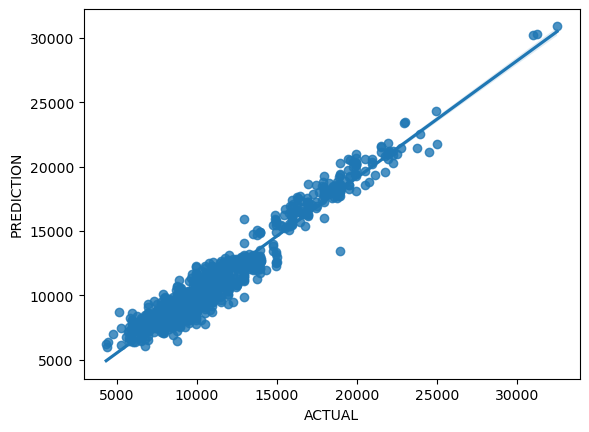

In [63]:
sns.regplot(data=Predict,x ='ACTUAL',y = 'PREDICTION')
plt.show()

### AdaBoostRegressor

In [64]:
best_model = AdaBoostRegressor().fit(x_train_fs ,y_train)
y_pred = best_model.predict(x_test_fs)
score = r2_score(y_test,y_pred)
print("score before hyper parameter tuning is :{}".format(score))

score before hyper parameter tuning is :0.8495696564182862


In [65]:
adr = AdaBoostRegressor()

In [66]:
parameter = {"n_estimators":[100,400,900],
            'learning_rate':[0.01,0.02,0.03,0.04],
            }

In [67]:
grid_adr = GridSearchCV(estimator= adr ,param_grid=parameter,cv=2,n_jobs=-1,verbose=3)

In [68]:
grid_adr.fit(x_train,y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=2, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'n_estimators': [100, 400, 900]},
             verbose=3)

In [69]:
grid_adr.best_params_

{'learning_rate': 0.01, 'n_estimators': 900}

In [70]:
grid_adr_tuned = AdaBoostRegressor(learning_rate=0.01,n_estimators=900)

In [71]:
grid_adr_tuned.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.01, n_estimators=900)

In [72]:
y_pred_adr = grid_adr_tuned.predict(x_test)

In [73]:
score = r2_score(y_test,y_pred_adr)
mae = mean_absolute_error(y_test,y_pred_adr)
mse = mean_squared_error(y_test,y_pred_adr)
rsme = np.sqrt(mse)
print('r2_score :',score)
print('mae      :',mae)
print('mse      :',mse)
print('rsme     :',rsme)

r2_score : 0.8739296969614309
mae      : 991.0935638754253
mse      : 1561146.7059779172
rsme     : 1249.4585651304797


In [74]:
predict_adr = grid_adr_tuned.predict(x)

In [75]:
price_adr = data.Price.values

In [76]:
PREDICT_ADR = pd.DataFrame(zip(predict_adr,price_adr),columns=("Actual","Prediction"))

In [77]:
PREDICT_ADR.head()

,Actual,Prediction
0,16268.830508,13500
1,16267.444444,13750
2,16268.830508,13950
3,16268.830508,14950
4,16270.533333,13750


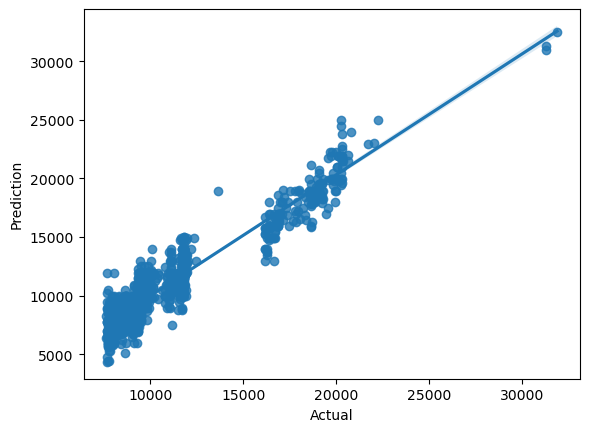

In [78]:
sns.regplot(data=PREDICT_ADR,x ='Actual',y ='Prediction')
plt.show()